In [2]:
import trig_poly
import dual_certificates
import test_data
import numpy as np
import plt_util
import phase_transition
from matplotlib import pyplot as plt

%matplotlib inline

In [3]:
def kernel_matrix(kernel, support):
    shifted_supports = np.outer(np.ones(N), support) - np.outer(support, np.ones(N))
    return kernel.eval(shifted_supports).real

In [188]:
fc = 30
min_separation = 0.65 / (2.0 * fc + 1)
N = int(0.5/min_separation)

kernel = trig_poly.TrigPoly.multi_dirichlet(fc, [2.0])
# kernel = trig_poly.TrigPoly.dirichlet(fc)

support = test_data.uniform_supports(N, min_separation=min_separation)

K0 = kernel_matrix(kernel, support)
K1 = kernel_matrix(kernel.derivative(), support)
K2 = kernel_matrix(kernel.derivative().derivative(), support)

In [189]:
kernel(0.0)

array([ 1.+0.j])

In [190]:
print 'Desired min separation:', min_separation
print 'Actual min separation: ', np.min(support[1:] - support[:-1])

Desired min separation: 0.0106557377049
Actual min separation:  0.010950550572


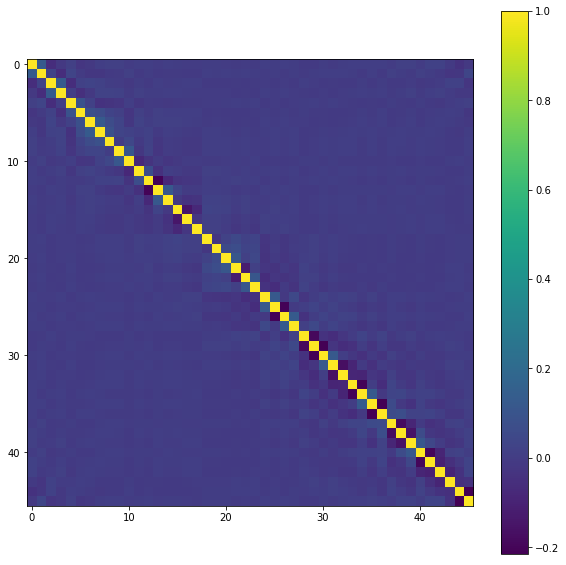

In [191]:
plt.subplots(figsize=(10, 10))
plt.imshow(K0)
plt.colorbar()

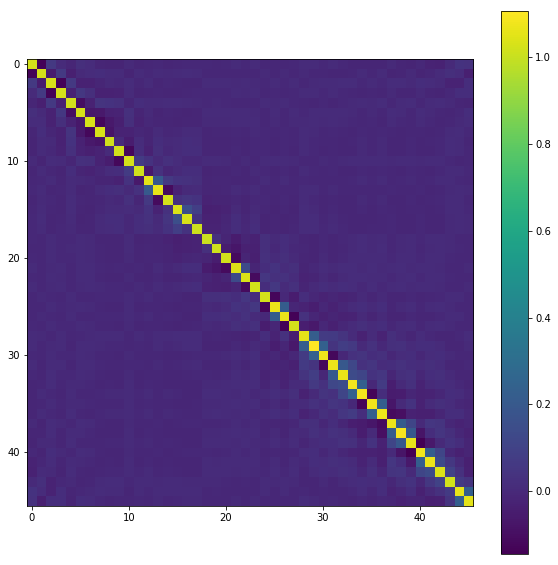

In [194]:
plt.subplots(figsize=(10, 10))
plt.imshow(np.linalg.inv(K0))
plt.colorbar()

In [177]:
for i in range(N - 1):
    print i, (support[1:] - support[:-1])[i]

0 0.0221930992494
1 0.0218955891338
2 0.0252872441092
3 0.0328142098962
4 0.0309954818897
5 0.0189923881125
6 0.0375360345871
7 0.0458171451828
8 0.0275139859748
9 0.0207577015452
10 0.032319891601
11 0.0216175424959
12 0.027934284364
13 0.0175806050943
14 0.0402558921925
15 0.0210642430093
16 0.0285292505661
17 0.0195517554025
18 0.0293906161572
19 0.039817997719
20 0.0331424404378
21 0.0160407275406
22 0.0258226936258
23 0.0190096011067
24 0.0323731447305
25 0.0195424699345
26 0.013320621632
27 0.0190712744998
28 0.0300834114895
29 0.0134106103251
30 0.0146409639023
31 0.0330055890553
32 0.0409716655533
33 0.0157102729114
34 0.0365510418187
35 0.0220874602223
36 0.014232750474


In [36]:
np.diag(np.dot(K1, np.linalg.inv(K0)))

array([ 39.20922154,  18.70234405,  12.57705425,   6.78705697,
         3.04813984,   2.42624753,   3.04075544,   4.65817789,
         1.61929928,   0.59051366,   1.90188384,   5.08347106,
         6.2712505 ,  10.05952829,  -0.62267879,  -6.52390116,
        -1.70479838,  -1.51200253,   4.14403315,   0.51437422,
        -4.03943175,  -0.60713935,  -0.61779535,  -3.05909749,
        -2.12068264,   3.65038307,   3.46655746,   0.07447356,
        -2.72677997,  -4.8900445 ,  -3.91222766,  -2.47267172,
        -2.54564283,  -3.20052687,  -6.11439943,  -8.20825839,
        -8.6875    , -11.125     , -17.75      , -38.5703125 ])

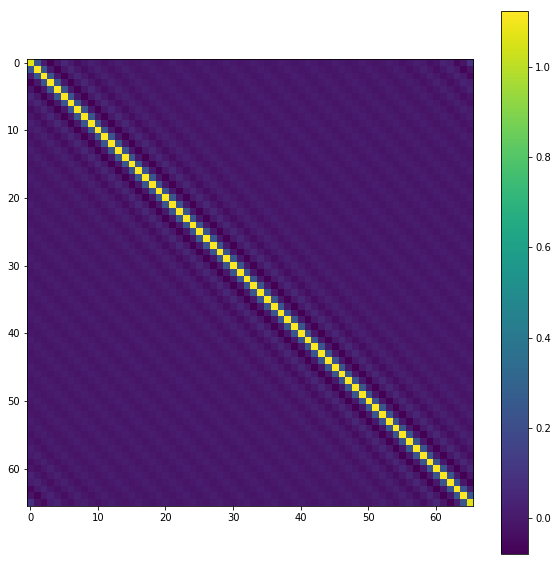

In [8]:
plt.subplots(figsize=(10, 10))
plt.imshow(np.linalg.inv(kernel_matrix(kernel, support)))
plt.colorbar()

# Tridiagonal Approximation

In [3]:
def tridiagonal_part(M):
    M_ret = np.zeros_like(M)
    for i in range(M.shape[0]):
        M_ret[i, i] = M[i, i]
        if i + 1 < M.shape[0]:
            M_ret[i, i + 1] = M[i, i + 1]
            M_ret[i + 1, i] = M[i + 1, i]
        if i - 1 >= 0:
            M_ret[i, i - 1] = M[i, i - 1]
            M_ret[i - 1, i] = M[i - 1, i]
    return M_ret

In [8]:
def tricirculant_part(M):
    M_ret = np.zeros_like(M)
    n = M.shape[0]
    for i in range(M.shape[0]):
        M_ret[i, i] = M[i, i]
        M_ret[i, (i + 1) % n] = M[i, (i + 1) % n]
        M_ret[(i + 1) % n, i] = M[(i + 1) % n, i]
        if i - 1 >= 0:
            M_ret[i, i - 1] = M[i, i - 1]
            M_ret[i - 1, i] = M[i - 1, i]
    return M_ret

In [42]:
fc = 50
min_separation = 1.5 / (2.0 * fc + 1)
N = int(1.0 / min_separation - 1)

kernel = trig_poly.TrigPoly.dirichlet(fc)

support = test_data.jittered_supports(N, min_separation=min_separation)

K0 = kernel_matrix(kernel, support)

In [44]:
from scipy.optimize import fsolve
f = lambda t: kernel(0).real - kernel(t).real ** 2
fsolve(f, x0=3.0 / 4.0 / fc)

array([ -4.87210679e-11])

In [32]:
K0_td = tridiagonal_part(K0)
K0_ci = tricirculant_part(K0)

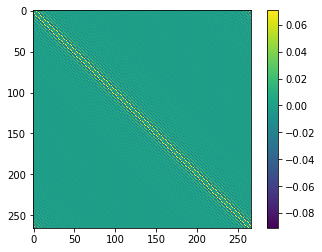

In [33]:
plt.imshow(K0 - K0_td)
plt.colorbar()

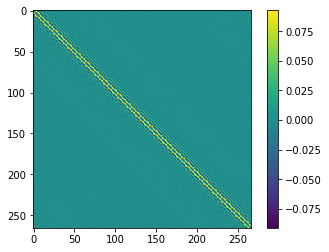

In [34]:
plt.imshow(np.linalg.inv(K0_td) - np.linalg.inv(K0))
plt.colorbar()